# <center> Python pour les TP/TIPE : ajustements de données </center>

***

**1)** Réaliser une régression linéaire

**2)** Réaliser un ajustement par une fonction quelconque

***

**Chargement des bibliothèques**

In [1]:
# Pour avoir les graphiques qui s'affichent sous le code
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as scpo
from scipy import stats as scps

# Pour avoir une écriture jolie dans les graphiques
plt.rc('mathtext', fontset="cm")  

***

## **1) Réaliser une régression linéaire**

***

Imaginons mesurer la vitesse $v$ après une chute libre de hauteur $h$ d'une bille lachée sans vitesse initiale. On récupère les données suivantes, avec une évaluation de l'incertitude sur chacune des mesures $\Delta v$.

***
$h$ (m) | $v$ (m/s) | $\Delta v$ (m/s)
:-: | :-:  | :-: 
0.2	| 2.8  | 0.6
1.2	| 5.7  | 0.6
2.2	| 7.5  | 0.6
3.2	| 8.3  | 1.0
4.2	| 9.5  | 0.6
5.2 | 10.7 | 0.6
6.2 | 11.5 | 0.6
7.2	| 13.0 | 0.6

***

Commençons par rentrer les données dans des tableaux.

In [2]:
h = np.array([0.2 + i for i in range(8)])
v = np.array([2.8, 5.7, 7.5, 8.3, 9.5, 10.7, 11.5, 13.0])
inc = np.array([0.6, 0.6, 0.6, 1.0, 0.6, 0.6, 0.6, 0.6])

Représentons graphiquement ces données.

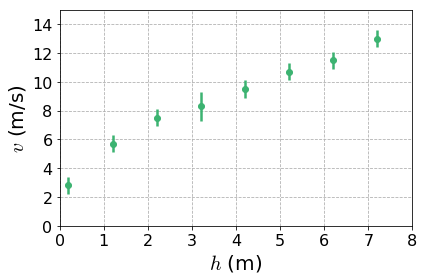

In [3]:
plt.xlim([0.0,8.])
plt.ylim([0., 15.])
plt.grid(linestyle='dashed')
plt.xlabel(r"$h$ (m)", fontsize=20)
plt.ylabel(r"$v$ (m/s)", fontsize=20)

plt.errorbar(h, v, yerr=inc, color='mediumseagreen', linestyle='None', elinewidth=2.5, marker='o', markersize=6.)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

L'expression théorique de la vitesse est

$$ v = \sqrt{2\, g\, h} $$

avec $g$ l'accélération de la pesanteur. On voit donc que $v^2$ tracée en fonction de $h$ doit donner une droite de pente $2\, g$.

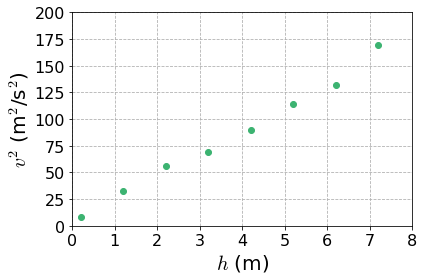

In [4]:
plt.xlim([0.0,8.])
plt.ylim([0., 200.])
plt.grid(linestyle='dashed')
plt.xlabel(r"$h$ (m)", fontsize=20)
plt.ylabel(r"$v^2$ (m$^2$/s$^2$)", fontsize=20)

plt.plot(h, v**2, color='mediumseagreen', linestyle='None', marker='o', markersize=6.)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

À l'oeil, le modèle théorique semble fonctionner. Pour rendre cette observation plus quantitative, on réalise une régression linéaire.

In [5]:
slope, intercept, r_value, p_value, std_err = scps.linregress(h, v**2)

print("Pente = " + str(round(slope,1)))
print("Ordonnée à l'origine = " + str(round(intercept,1)))
print("R^2 = " + str(round(r_value**2,3)))

Pente = 21.7
Ordonnée à l'origine = 3.6
R^2 = 0.99


On peut la tracer.

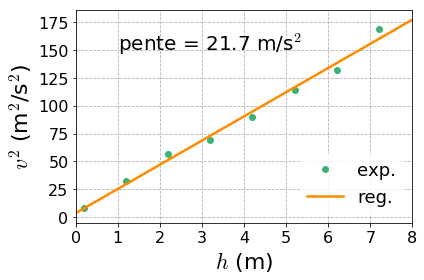

In [6]:
t = np.linspace(0,8,200)          #définition de l'abscisse pour le tracé.

plt.xlim([0.0,8.])
plt.grid(linestyle='dashed')
plt.xlabel(r"$h$ (m)", fontsize=22)
plt.ylabel(r"$v^2$ (m$^2$/s$^2$)", fontsize=22)

plt.plot(h, v**2, color='mediumseagreen', linestyle='None', marker='o', markersize=6., label="exp.")
plt.plot(t, slope * t + intercept, color='darkorange', linewidth=2.5, label=r"reg.")

plt.text(1,150, "pente = " + str(round(slope,1)) + " m/s$^2$", fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
legend = plt.legend(loc = 4, numpoints = 1, handlelength=2., frameon=1, fontsize=18)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
plt.tight_layout()
plt.show()

Remarquons que la pente attendue théoriquement est $2\, g$ soit 19.6 m/s$^2$. La valeur obtenue 21.7 m/s$^2$ est acceptable.

***

## **2) Réaliser un ajustement par une fonction quelconque**

***

On peut aussi chercher à ajuster directement la courbe $v = f(h)$ par la loi

$$ f(h) = \sqrt{a\, h} $$

Pour cela on commence par définir $f$, puis on réalise l'ajustement par la méthode **curve_fit**.

In [7]:
def f(x, a) :
    return np.sqrt(a * x)

popt, pcov = scpo.curve_fit(f,h,v)  

#ici, f a un seul paramètre a : popt est donc un tableau de 1 valeur et on accède à a par popt[0]

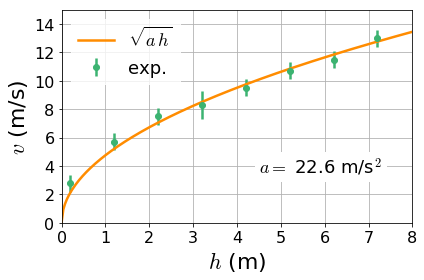

In [8]:
t = np.linspace(0,8,200)          #définition de l'abscisse pour le tracé.

plt.xlim([0.0,8.])
plt.ylim([0., 15.])
plt.grid()
plt.xlabel(r"$h$ (m)", fontsize=22)
plt.ylabel(r"$v$ (m/s)", fontsize=22)
plt.errorbar(h, v, yerr=inc, color='mediumseagreen', linestyle='None', elinewidth=2.5, marker='o', markersize=6., label="exp.")
plt.plot(t, f(t, popt[0]), color='darkorange', linewidth=2.5, label=r"$\sqrt{a\, h}$")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.text(4.5,3.5,r"$a =$ " + str(round(popt[0],1)) + r" m/s$^2$", fontsize=18, backgroundcolor='white')

legend = plt.legend(loc = 2, numpoints = 1, handlelength=2., frameon=1, fontsize=18)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')

plt.tight_layout()
plt.show()

Comme avant, la pente attendue théoriquement est $2\, g$ soit 19.6 m/s$^2$. La valeur obtenue 22.6 m/s$^2$ est acceptable.